100%|██████████| 9.91M/9.91M [00:01<00:00, 5.83MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 155kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.16MB/s]


Epoch 1 completed 
Epoch 2 completed 
Epoch 3 completed 
Epoch 4 completed 
Epoch 5 completed 
 Test Accuracy: 0.9888


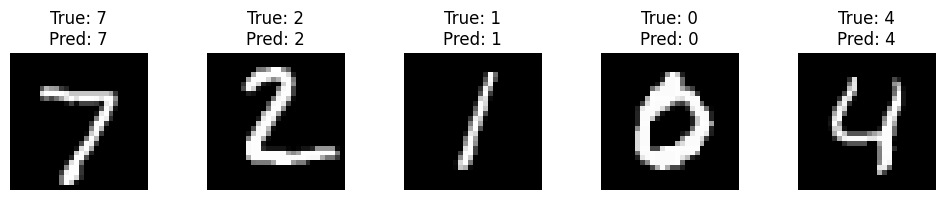

In [1]:
#  Step 1: Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#  Step 2: Data preprocessing & loading
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize MNIST mean & std
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(12 * 12 * 64, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 12 * 12 * 64)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

model = CNN()

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(5):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed ")

    model.eval()
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        preds = output.argmax(dim=1)
        correct += (preds == target).sum().item()
        total += target.size(0)

accuracy = correct / total
print(f" Test Accuracy: {accuracy:.4f}")

# Get 5 test samples
samples = next(iter(test_loader))
images, labels = samples
output = model(images)
preds = output.argmax(dim=1)

# Plot 5 samples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"True: {labels[i]}\nPred: {preds[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()